In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

### Dataset

In [2]:
df1 = pd.read_csv("data/scenario1_baseline.csv")
df2 = pd.read_csv("data/scenario2_malicious.csv")

In [3]:
df1

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,189.40,0.0,0.0
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,145.70,0.0,0.0
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,144.90,0.0,0.0
3,1,OV_1,MAIN_1,9712,40.467,9669,43,0,0,43,...,0,0.0,0,0,0.0,0.0,0.0,194.24,0.0,0.0
4,1,OV_2,MAIN_2,7160,29.833,7160,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,143.20,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,48,OV_2,MAIN_2,7087,29.529,7082,5,0,0,5,...,0,0.0,0,0,0.0,0.0,0.0,141.74,0.0,0.0
146,48,OV_3,MAIN_3,7305,30.438,7291,14,0,0,14,...,0,0.0,0,0,0.0,0.0,0.0,146.10,0.0,0.0
147,49,OV_1,MAIN_1,9604,40.017,9589,15,0,0,15,...,0,0.0,0,0,0.0,0.0,0.0,192.08,0.0,0.0
148,49,OV_2,MAIN_2,7356,30.650,7356,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,147.12,0.0,0.0


In [4]:
df2

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.0,473.50,0.0,0.00
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.0,364.25,0.0,0.00
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.0,362.25,0.0,0.00
3,1,OV_1,MAIN_1,9712,40.467,7577,0,2135,0,2135,...,2368,7.104,2637,2135,100.0,2367.76,0.0,485.60,0.0,2367.76
4,1,OV_2,MAIN_2,7160,29.833,7132,27,1,0,28,...,0,0.000,0,0,0.0,0.00,0.0,358.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,48,OV_2,MAIN_2,7315,30.479,7306,9,0,0,9,...,0,0.000,0,0,0.0,0.00,0.0,365.75,0.0,0.00
146,48,OV_3,MAIN_3,7246,30.192,7235,11,0,0,11,...,0,0.000,0,0,0.0,0.00,0.0,362.30,0.0,0.00
147,49,OV_1,MAIN_1,9425,39.271,9412,13,0,0,13,...,0,0.000,0,0,0.0,0.00,0.0,471.25,0.0,0.00
148,49,OV_2,MAIN_2,7298,30.408,7298,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.0,364.90,0.0,0.00


### Check

In [237]:
# 2) Normalizzazione nomi colonne
def clean_columns(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

df1 = clean_columns(df1)
df2 = clean_columns(df2)

In [19]:
df1.columns

Index(['epoch', 'node', 'main', 'assigned_slots', 'share_assigned_slots', 'ok',
       'skipped', 'invalid', 'delayed', 'bad_slots_abs', 'bad_slots_pct_node',
       'effective_stake', 'stake_share_pct', 'effective_stake_next',
       'stake_share_next_pct', 'delivered_slots_share_pct',
       'coinbase_epoch_TKG', 'fees_epoch_TKR_at_main',
       'reward_epoch_total_value_TKG_only', 'coinbase_cum_TKG',
       'fees_cum_TKR_at_main', 'penalty_slots_residual', 'penalty_score',
       'forced_invalid_slots_planned', 'forced_invalid_slots_realized',
       'forced_invalid_share_pct_of_invalid', 'penalty_gained',
       'penalty_recovery', 'penalty_tol', 'residual_prev_dbg',
       'residual_next_dbg', 'ok_rate', 'scenario', 'assigned_share'],
      dtype='object')

In [5]:
df2.columns

Index(['epoch', 'overflow', 'main', 'assigned_slots', 'share_assigned_slots',
       'ok', 'skipped', 'invalid', 'delayed', 'bad_slots_abs',
       'bad_slots_pct_node', 'effective_stake', 'stake_share_pct',
       'effective_stake_next', 'stake_share_next_pct',
       'delivered_slots_share_pct', 'coinbase_epoch_tkg',
       'fees_epoch_tkr_at_main', 'reward_epoch_total_value_tkg_only',
       'coinbase_cum_tkg', 'fees_cum_tkr_at_main', 'penalty_slots_residual',
       'penalty_score', 'forced_invalid_slots_planned',
       'forced_invalid_slots_realized', 'forced_invalid_share_pct_of_invalid',
       'penalty_gained', 'penalty_recovery', 'penalty_tol',
       'residual_prev_dbg', 'residual_next_dbg'],
      dtype='object')

In [12]:
df1.dtypes

epoch                                    int64
overflow                                object
main                                    object
assigned_slots                           int64
share_assigned_slots                   float64
ok                                       int64
skipped                                  int64
invalid                                  int64
delayed                                  int64
bad_slots_abs                            int64
bad_slots_pct_node                     float64
effective_stake                        float64
stake_share_pct                        float64
effective_stake_next                   float64
stake_share_next_pct                   float64
delivered_slots_share_pct              float64
coinbase_epoch_tkg                     float64
fees_epoch_tkr_at_main                 float64
reward_epoch_total_value_tkg_only      float64
coinbase_cum_tkg                       float64
fees_cum_tkr_at_main                   float64
penalty_slots

In [13]:
df2.dtypes

epoch                                    int64
overflow                                object
main                                    object
assigned_slots                           int64
share_assigned_slots                   float64
ok                                       int64
skipped                                  int64
invalid                                  int64
delayed                                  int64
bad_slots_abs                            int64
bad_slots_pct_node                     float64
effective_stake                        float64
stake_share_pct                        float64
effective_stake_next                   float64
stake_share_next_pct                   float64
delivered_slots_share_pct              float64
coinbase_epoch_tkg                     float64
fees_epoch_tkr_at_main                 float64
reward_epoch_total_value_tkg_only      float64
coinbase_cum_tkg                       float64
fees_cum_tkr_at_main                   float64
penalty_slots

### New features

In [5]:
# df1
df1["ok_rate"] = df1["ok"] / df1["assigned_slots"]
df1["scenario"] = 1
df1["assigned_share"] = df1["assigned_slots"] / 24000

In [6]:
# df2
df2["ok_rate"] = df2["ok"] / df2["assigned_slots"]
df2["scenario"] = 2
df2["assigned_share"] = df2["assigned_slots"] / 24000

df2["malicious_i"] = (df2["overflow"] == "OV_1").astype(int)
df2["post_t"] = (df2["epoch"] >= 50).astype(int)
df2["interaction"] = df2["malicious_i"] * df2["post_t"]

df2["time_since_switch"] = np.where(df2["epoch"] >= 50, df2["epoch"] - 50, 0)

### Panel and check

In [291]:
# 4) Concatenazione opzionale
panel = pd.concat([df1, df2], ignore_index=True)

In [7]:
panel

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share,malicious_i,post_t,interaction,time_since_switch
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,189.0,0.0,0.0,1.0,1,0.394583,NaN,NaN,NaN,NaN
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,145.0,0.0,0.0,1.0,1,0.303542,NaN,NaN,NaN,NaN
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,144.0,0.0,0.0,1.0,1,0.301875,NaN,NaN,NaN,NaN
3,1,OV_1,MAIN_1,9564,39.850,9564,0,0,0,0,...,191.0,0.0,0.0,1.0,1,0.398500,NaN,NaN,NaN,NaN
4,1,OV_2,MAIN_2,7261,30.254,7261,0,0,0,0,...,145.0,0.0,0.0,1.0,1,0.302542,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,198,OV_2,MAIN_2,7447,31.029,7447,0,0,0,0,...,1489.0,0.0,0.0,1.0,2,0.310292,0.0,1.0,0.0,148.0
1196,198,OV_3,MAIN_3,7316,30.483,7316,0,0,0,0,...,1463.0,0.0,0.0,1.0,2,0.304833,0.0,1.0,0.0,148.0
1197,199,OV_1,MAIN_1,9340,38.917,9340,0,0,0,0,...,1868.0,0.0,0.0,1.0,2,0.389167,1.0,1.0,1.0,149.0
1198,199,OV_2,MAIN_2,7347,30.612,7347,0,0,0,0,...,1469.0,0.0,0.0,1.0,2,0.306125,0.0,1.0,0.0,149.0


In [8]:
panel.shape

(1200, 38)

In [10]:
panel.columns

Index(['epoch', 'overflow', 'main', 'assigned_slots', 'share_assigned_slots',
       'ok', 'skipped', 'invalid', 'delayed', 'bad_slots_abs',
       'bad_slots_pct_node', 'effective_stake', 'stake_share_pct',
       'effective_stake_next', 'stake_share_next_pct',
       'delivered_slots_share_pct', 'coinbase_epoch_tkg',
       'fees_epoch_tkr_at_main', 'reward_epoch_total_value_tkg_only',
       'coinbase_cum_tkg', 'fees_cum_tkr_at_main', 'penalty_slots_residual',
       'penalty_score', 'forced_invalid_slots_planned',
       'forced_invalid_slots_realized', 'forced_invalid_share_pct_of_invalid',
       'penalty_gained', 'penalty_recovery', 'penalty_tol',
       'residual_prev_dbg', 'residual_next_dbg', 'ok_rate', 'scenario',
       'assigned_share', 'malicious_i', 'post_t', 'interaction',
       'time_since_switch'],
      dtype='object')

In [20]:
panel.head()

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,0,0,0.0,0.0,9470.0,189.0,0.0,0.0,1.0,1.0
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,0,0,0.0,0.0,7285.0,145.0,0.0,0.0,1.0,1.0
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,0,0,0.0,0.0,7245.0,144.0,0.0,0.0,1.0,1.0
3,1,OV_1,MAIN_1,9564,39.850,9564,0,0,0,0,...,0,0,0.0,0.0,9564.0,191.0,0.0,0.0,1.0,1.0
4,1,OV_2,MAIN_2,7261,30.254,7261,0,0,0,0,...,0,0,0.0,0.0,7261.0,145.0,0.0,0.0,1.0,1.0


In [11]:
# 6) Controlla NaN e valori anomali
panel.isna().sum()

epoch                                    0
overflow                                 0
main                                     0
assigned_slots                           0
share_assigned_slots                     0
ok                                       0
skipped                                  0
invalid                                  0
delayed                                  0
bad_slots_abs                            0
bad_slots_pct_node                       0
effective_stake                          0
stake_share_pct                          0
effective_stake_next                     0
stake_share_next_pct                     0
delivered_slots_share_pct                0
coinbase_epoch_tkg                       0
fees_epoch_tkr_at_main                   0
reward_epoch_total_value_tkg_only        0
coinbase_cum_tkg                         0
fees_cum_tkr_at_main                     0
penalty_slots_residual                   0
penalty_score                            0
forced_inva

In [12]:
df1.isna().sum()

epoch                                  0
overflow                               0
main                                   0
assigned_slots                         0
share_assigned_slots                   0
ok                                     0
skipped                                0
invalid                                0
delayed                                0
bad_slots_abs                          0
bad_slots_pct_node                     0
effective_stake                        0
stake_share_pct                        0
effective_stake_next                   0
stake_share_next_pct                   0
delivered_slots_share_pct              0
coinbase_epoch_tkg                     0
fees_epoch_tkr_at_main                 0
reward_epoch_total_value_tkg_only      0
coinbase_cum_tkg                       0
fees_cum_tkr_at_main                   0
penalty_slots_residual                 0
penalty_score                          0
forced_invalid_slots_planned           0
forced_invalid_s

In [13]:
df2.isna().sum()

epoch                                  0
overflow                               0
main                                   0
assigned_slots                         0
share_assigned_slots                   0
ok                                     0
skipped                                0
invalid                                0
delayed                                0
bad_slots_abs                          0
bad_slots_pct_node                     0
effective_stake                        0
stake_share_pct                        0
effective_stake_next                   0
stake_share_next_pct                   0
delivered_slots_share_pct              0
coinbase_epoch_tkg                     0
fees_epoch_tkr_at_main                 0
reward_epoch_total_value_tkg_only      0
coinbase_cum_tkg                       0
fees_cum_tkr_at_main                   0
penalty_slots_residual                 0
penalty_score                          0
forced_invalid_slots_planned           0
forced_invalid_s

In [16]:
df1.to_csv("dataset/scenario1.csv", index=False)
df2.to_csv("dataset/scenario2.csv", index=False)
panel.to_csv("dataset/panel.csv", index=False)

### Sanity checks

In [126]:
pd.set_option("display.max_columns", None)  # mostra tutte le colonne
pd.set_option("display.width", 0)           # evita il troncamento orizzontale

In [127]:
df1.groupby("overflow").describe()

epoch                                                    \
          count  mean        std  min    25%   50%     75%    max   
overflow                                                            
OV_1      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   
OV_2      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   
OV_3      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   

         assigned_slots                                                \
                  count      mean        std     min      25%     50%   
overflow                                                                
OV_1              200.0  9597.165  72.590874  9409.0  9542.75  9601.0   
OV_2              200.0  7200.415  71.886795  7040.0  7151.75  7198.5   
OV_3              200.0  7202.420  67.781452  7019.0  7158.75  7196.5   

                          share_assigned_slots                               \
              75%     max                count       mean       std     min   
overflow                                                                      
OV_1      9649.00  9794.0                200.0  39.988145  0.302464  39.204   
OV_2      7250.50  7383.0                200.0  30.001735  0.299493  29.333   
OV_3      7251.25  7348.0                200.0  30.010050  0.282411  29.246   

                                                  ok                       \
               25%      50%       75%     max  count      mean        std   
overflow                                                                    
OV_1      39.76175  40.0040  40.20400  40.808  200.0  9597.165  72.590874   
OV_2      29.79900  29.9940  30.21025  30.762  200.0  7200.415  71.886795   
OV_3      29.82800  29.9855  30.21325  30.617  200.0  7202.420  67.781452   

                                                   skipped                 \
             min      25%     50%      75%     max   count mean  std  min   
overflow                                                                    
OV_1      9409.0  9542.75  9601.0  9649.00  9794.0   200.0  0.0  0.0  0.0   
OV_2      7040.0  7151.75  7198.5  7250.50  7383.0   200.0  0.0  0.0  0.0   
OV_3      7019.0  7158.75  7196.5  7251.25  7348.0   200.0  0.0  0.0  0.0   

                             invalid                                     \
          25%  50%  75%  max   count mean  std  min  25%  50%  75%  max   
overflow                                                                  
OV_1      0.0  0.0  0.0  0.0   200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
OV_2      0.0  0.0  0.0  0.0   200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
OV_3      0.0  0.0  0.0  0.0   200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         delayed                                    bad_slots_abs            \
           count mean  std  min  25%  50%  75%  max         count mean  std   
overflow                                                                      
OV_1       200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         200.0  0.0  0.0   
OV_2       200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         200.0  0.0  0.0   
OV_3       200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         200.0  0.0  0.0   

                                  bad_slots_pct_node                           \
          min  25%  50%  75%  max              count mean  std  min  25%  50%   
overflow                                                                        
OV_1      0.0  0.0  0.0  0.0  0.0              200.0  0.0  0.0  0.0  0.0  0.0   
OV_2      0.0  0.0  0.0  0.0  0.0              200.0  0.0  0.0  0.0  0.0  0.0   
OV_3      0.0  0.0  0.0  0.0  0.0              200.0  0.0  0.0  0.0  0.0  0.0   

                   effective_stake                                            \
          75%  max           count        mean        std    min         25%   
overflow                                                                       
OV_1      0.0  0.0           200.0  495.470824  55.553763  400.0  447.722725   
OV_2      0.0  0.0    

In [128]:
df2.groupby("overflow").describe()

epoch                                                assigned_slots  \
         count  mean       std  min    25%   50%    75%   max          count   
overflow                                                                       
OV_1      50.0  24.5  14.57738  0.0  12.25  24.5  36.75  49.0           50.0   
OV_2      50.0  24.5  14.57738  0.0  12.25  24.5  36.75  49.0           50.0   
OV_3      50.0  24.5  14.57738  0.0  12.25  24.5  36.75  49.0           50.0   

                                                                           \
             mean          std     min      25%     50%      75%      max   
overflow                                                                    
OV_1      7697.04  3221.870232  1075.0  9260.75  9340.5  9408.75   9564.0   
OV_2      8147.40  1602.355498  7166.0  7277.25  7335.5  7449.00  11500.0   
OV_3      8155.56  1622.178759  7175.0  7267.50  7323.0  7486.75  11514.0   

         share_assigned_slots                                                  \
                        count      mean        std     min       25%      50%   
overflow                                                                        
OV_1                     50.0  32.07102  13.424422   4.479  38.58625  38.9190   
OV_2                     50.0  33.94752   6.676539  29.858  30.32225  30.5650   
OV_3                     50.0  33.98150   6.759017  29.896  30.28125  30.5125   

                              ok                                         \
               75%     max count     mean          std     min      25%   
overflow                                                                  
OV_1      39.20300  39.850  50.0  7587.68  3330.538802   903.0  9200.00   
OV_2      31.03775  47.917  50.0  8147.40  1602.355498  7166.0  7277.25   
OV_3      31.19475  47.975  50.0  8155.54  1622.190120  7175.0  7267.50   

                                   skipped                                     \
             50%      75%      max   count mean  std  min  25%  50%  75%  max   
overflow                                                                        
OV_1      9338.0  9403.25   9514.0    50.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
OV_2      7335.5  7449.00  11500.0    50.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
OV_3      7323.0  7486.75  11514.0    50.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         invalid                                                 delayed       \
           count    mean         std  min  25%  50%  75%     max   count mean   
overflow                                                                        
OV_1        50.0  109.36  360.160155  0.0  0.0  0.0  0.0  2391.0    50.0  0.0   
OV_2        50.0    0.00    0.000000  0.0  0.0  0.0  0.0     0.0    50.0  0.0   
OV_3        50.0    0.02    0.141421  0.0  0.0  0.0  0.0     1.0    50.0  0.0   

                                       bad_slots_abs                           \
          std  min  25%  50%  75%  max         count    mean         std  min   
overflow                                                                        
OV_1      0.0  0.0  0.0  0.0  0.0  0.0          50.0  109.36  360.160155  0.0   
OV_2      0.0  0.0  0.0  0.0  0.0  0.0          50.0    0.00    0.000000  0.0   
OV_3      0.0  0.0  0.0  0.0  0.0  0.0          50.0    0.02    0.141421  0.0   

                                bad_slots_pct_node                         \
          25%  50%  75%     max              count    mean       std  min   
overflow                                                                    
OV_1      0.0  0.0  0.0  2391.0               50.0  4.4958  9.693149  0.0   
OV_2      0.0  0.0  0.0     0.0               50.0  0.0000  0.000000  0.0   
OV_3      0.0  0.0  0.0     1.0               50.0  0.0002  0.001414  0.0   

                               effective_stake                          \
          25%  50%  75%    max           count        mean         std   
overflow                                               

### DF1

In [20]:
df1 = df1.rename(columns={"overflow": "node"})

metrics = ["ok_rate", "reward_epoch_total_value_TKG_only", "stake_share_pct", "penalty_slots_residual"]
title_map = {
    "ok_rate": "ok_rate over time (Scenario 1)",
    "reward_epoch_total_value_TKG_only": "reward_total over time (Scenario 1)",
    "stake_share_pct": "_stake_share_pct over time (Scenario 1)",
    "penalty_slots_residual": "penalty_residual over time (Scenario 1)",
}

nodes = sorted(df1["node"].unique())
vline_epoch = 50  # linea verticale coerente con lo scenario 2 per confronto visuale

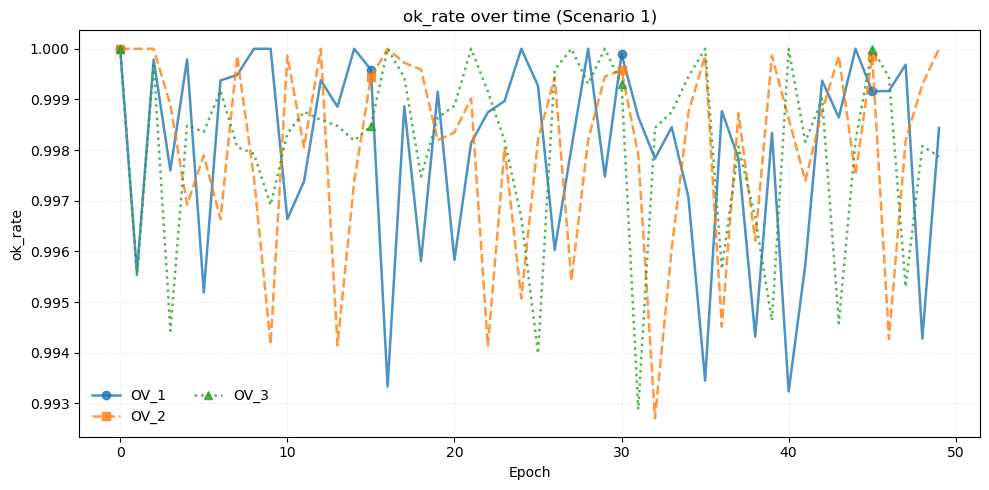

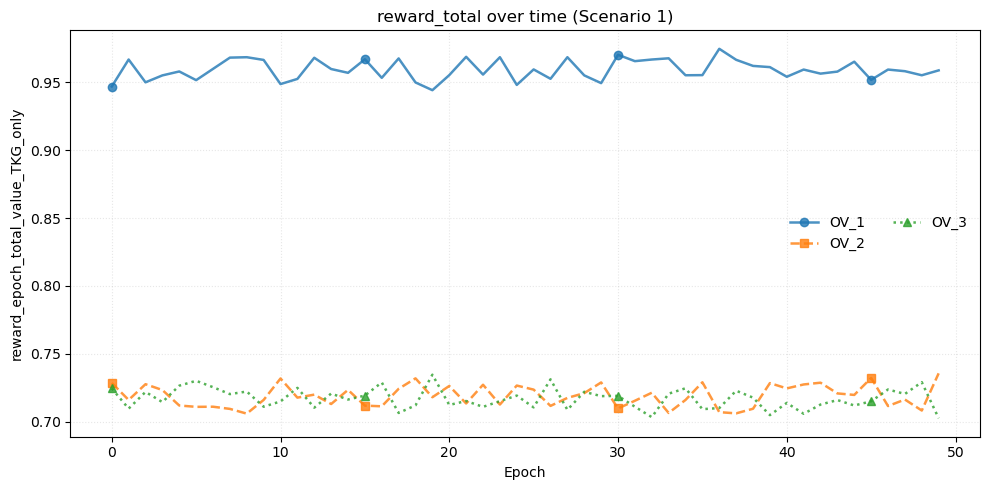

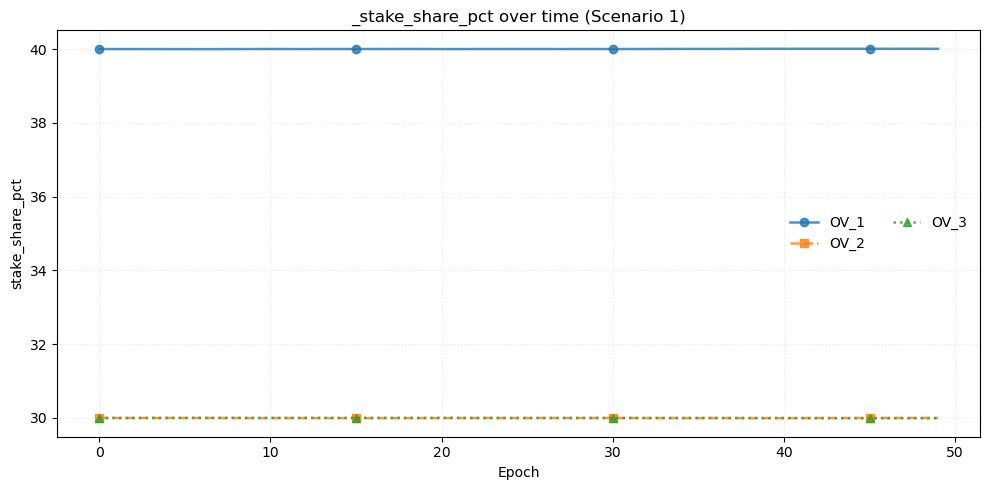

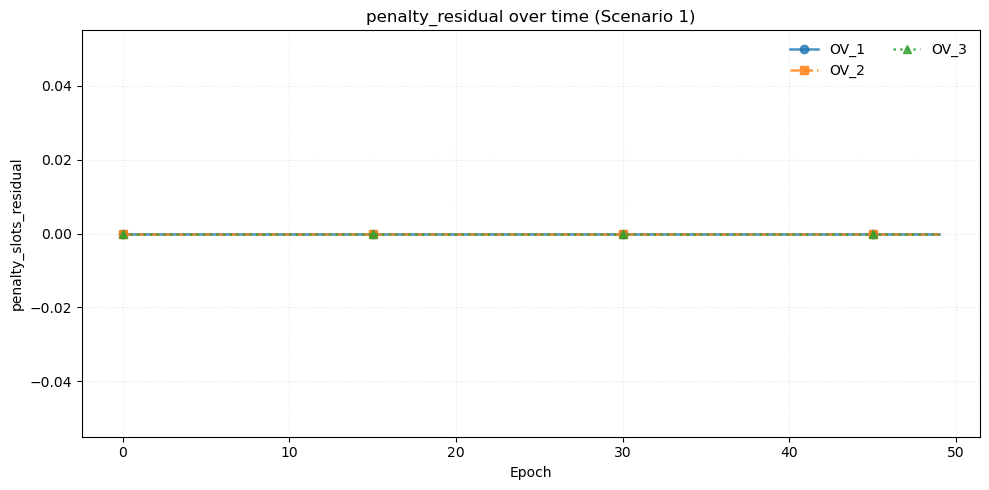

In [21]:
# Palette colori e stili
colors = plt.cm.tab10.colors           # 10 colori diversi
linestyles = ["-", "--", ":", "-."]    # alterna stili per distinguere meglio
markers = ["o", "s", "^", "D", "x", "v", "P", "*"]  # marker visibili

for var in metrics:
    if var not in df1.columns:
        print(var)
        continue  # salta se colonna mancante

    plt.figure(figsize=(10, 5))

    # Ciclo sui nodi con combinazione unica (colore + stile + marker)
    for (nd, color, ls, mk) in zip(nodes, colors, itertools.cycle(linestyles), itertools.cycle(markers)):
        sub = df1[df1["node"] == nd]

        plt.plot(
            sub["epoch"],
            sub[var],
            label=str(nd),
            color=color,
            linestyle=ls,
            marker=mk,
            markevery=15,     # ogni 15 punti mette un marker
            alpha=0.8,        # trasparenza per vedere sovrapposizioni
            linewidth=1.8
        )

    # Titoli e asse
    plt.xlabel("Epoch")
    plt.ylabel(var)
    plt.title(title_map.get(var, f"{var} over time (Scenario 1)"))
    plt.legend(frameon=False, ncol=len(nodes)//2 + 1)
    plt.grid(alpha=0.3, linestyle=":")
    plt.tight_layout()

    # Salva e mostra
    out_path = f"fig/scen1_{var}_timeseries.png"
    plt.savefig(out_path, dpi=200)
    plt.show()


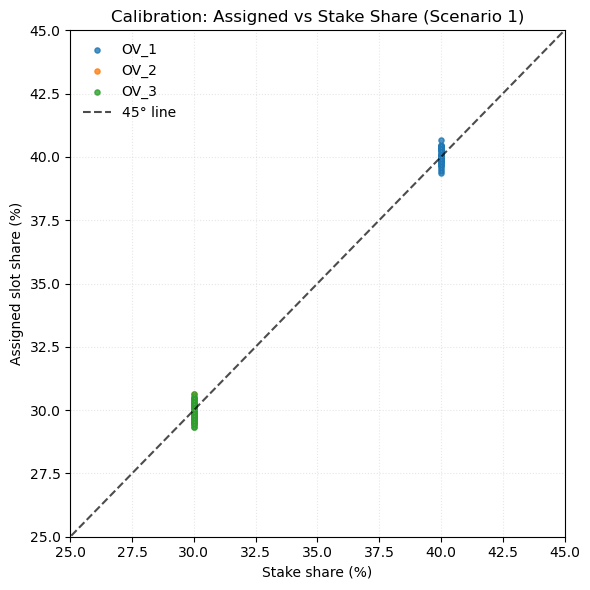

In [22]:
plt.figure(figsize=(6, 6))

# Scatter per ogni nodo
for nd in df1["node"].unique():
    sub = df1[df1["node"] == nd]
    plt.scatter(
        sub["stake_share_pct"],
        sub["share_assigned_slots"],
        s=14,
        label=str(nd),
        alpha=0.8
    )

# Linea 45° coerente con scala 0–100
lo, hi = 0, 100
plt.plot([lo, hi], [lo, hi], color="black", linestyle="--", alpha=0.7, label="45° line")

plt.xlim(25, 45)
plt.ylim(25, 45)
plt.xlabel("Stake share (%)")
plt.ylabel("Assigned slot share (%)")
plt.title("Calibration: Assigned vs Stake Share (Scenario 1)")
plt.legend(frameon=False)
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout()
# --- Salvataggio ---
out_path = "fig/scen1_calibration.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

### DF2

In [24]:
df2 = df2.rename(columns={"overflow": "node"})

metrics = ["ok_rate", "reward_epoch_total_value_TKG_only", "stake_share_pct", "penalty_slots_residual"]
title_map = {
    "ok_rate": "ok_rate over time (Scenario 2)",
    "reward_epoch_total_value_TKG_only": "reward_total over time (Scenario 2)",
    "stake_share_pct": "_stake_share_pct over time (Scenario 2)",
    "penalty_slots_residual": "penalty_residual over time (Scenario 2)",
}

nodes = sorted(df2["node"].unique())
vline_epoch = 10  # linea verticale coerente con lo scenario 2 per confronto visuale

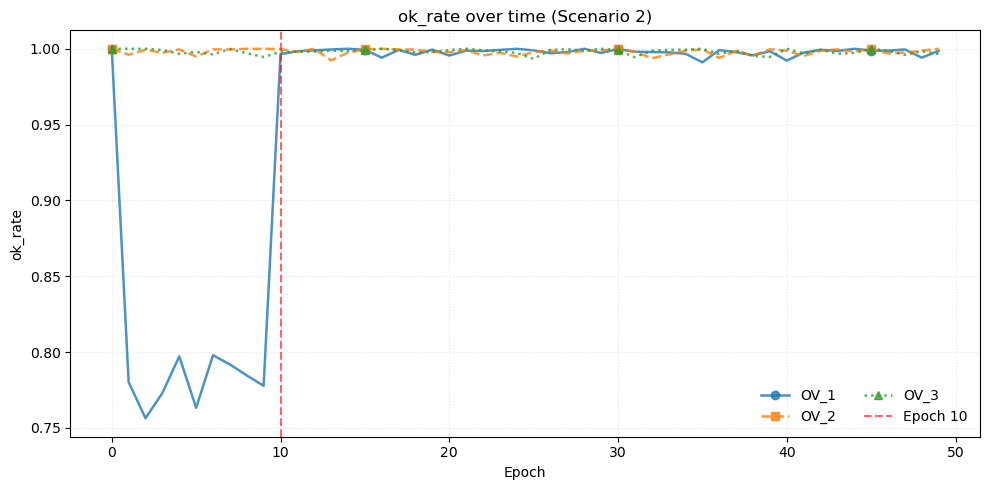

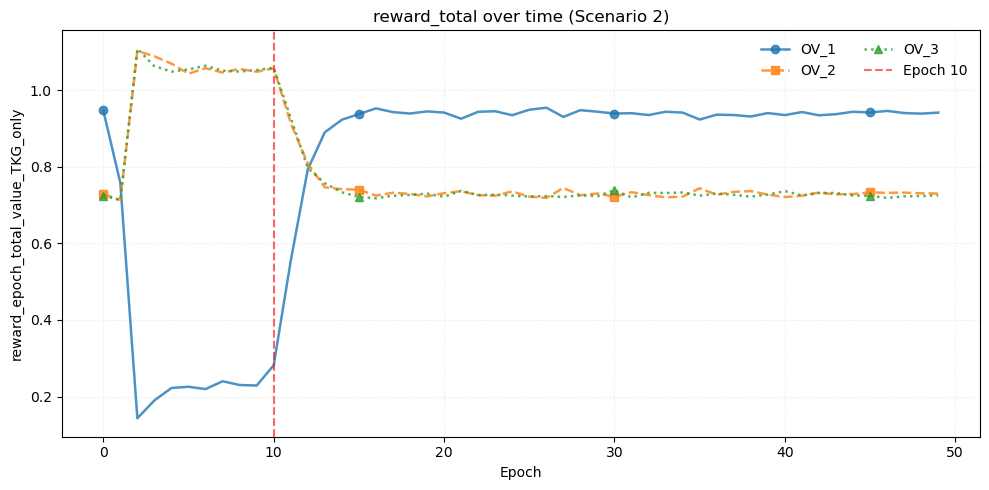

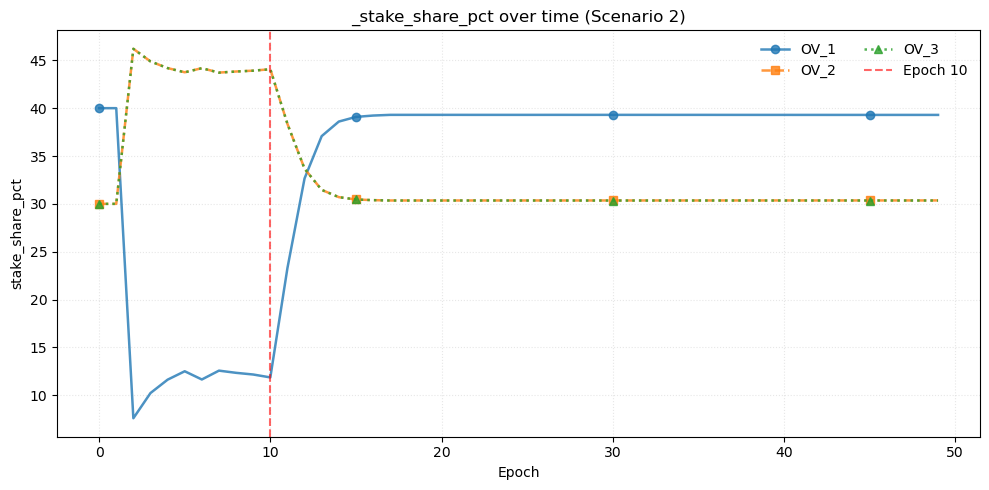

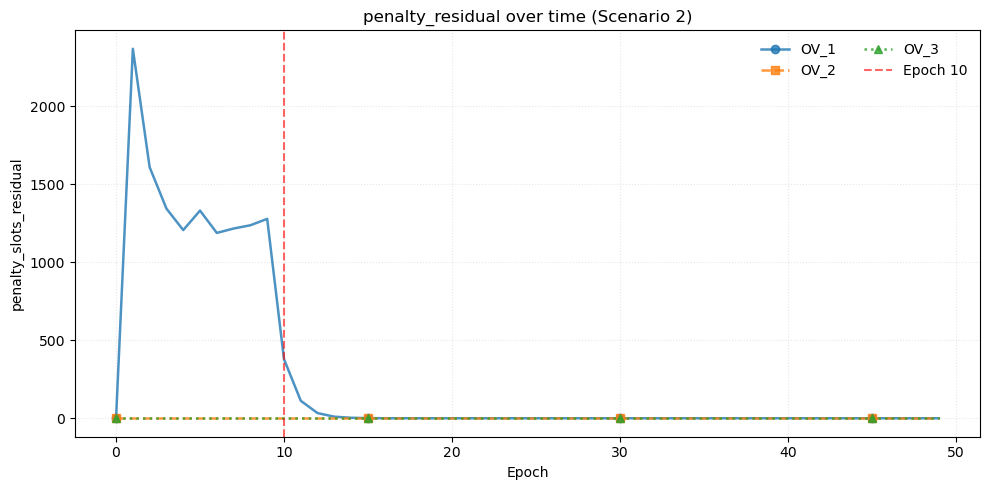

In [25]:
# Palette colori e stili
colors = plt.cm.tab10.colors           # 10 colori diversi
linestyles = ["-", "--", ":", "-."]    # alterna stili per distinguere meglio
markers = ["o", "s", "^", "D", "x", "v", "P", "*"]  # marker visibili

for var in metrics:
    if var not in df2.columns:
        continue  # salta se colonna mancante

    plt.figure(figsize=(10, 5))

    # Ciclo sui nodi con combinazione unica (colore + stile + marker)
    for (nd, color, ls, mk) in zip(nodes, colors, itertools.cycle(linestyles), itertools.cycle(markers)):
        sub = df2[df2["node"] == nd]

        plt.plot(
            sub["epoch"],
            sub[var],
            label=str(nd),
            color=color,
            linestyle=ls,
            marker=mk,
            markevery=15,     # ogni 15 punti mette un marker
            alpha=0.8,        # trasparenza per vedere sovrapposizioni
            linewidth=1.8
        )

    # Linea verticale a epoch 50 (riferimento redenzione)
    plt.axvline(vline_epoch, linestyle="--", color="red", alpha=0.6, label="Epoch 10")

    # Titoli e asse
    plt.xlabel("Epoch")
    plt.ylabel(var)
    plt.title(title_map.get(var, f"{var} over time (Scenario 1)"))
    plt.legend(frameon=False, ncol=len(nodes)//2 + 1)
    plt.grid(alpha=0.3, linestyle=":")
    plt.tight_layout()

    # Salva e mostra
    out_path = f"fig/scen2_{var}_timeseries.png"
    plt.savefig(out_path, dpi=200)
    plt.show()

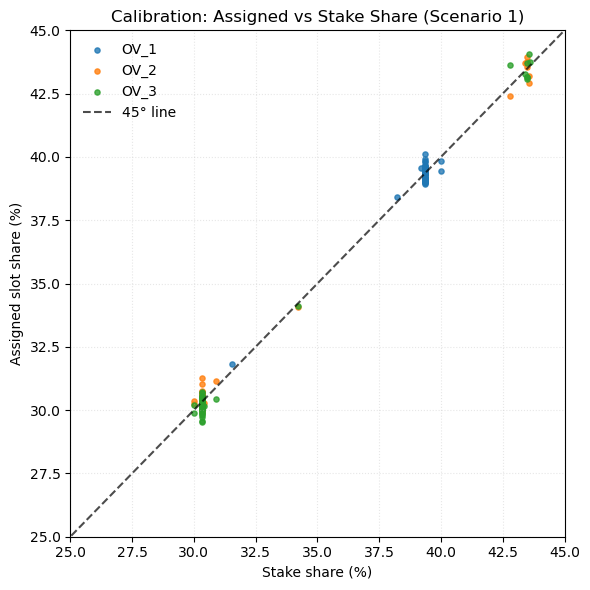

In [20]:
plt.figure(figsize=(6, 6))

# Scatter per ogni nodo
for nd in df2["node"].unique():
    sub = df2[df2["node"] == nd]
    plt.scatter(
        sub["stake_share_pct"],
        sub["share_assigned_slots"],
        s=14,
        label=str(nd),
        alpha=0.8
    )

# Linea 45° coerente con scala 0–100
lo, hi = 0, 100
plt.plot([lo, hi], [lo, hi], color="black", linestyle="--", alpha=0.7, label="45° line")

plt.xlim(25, 45)
plt.ylim(25, 45)
plt.xlabel("Stake share (%)")
plt.ylabel("Assigned slot share (%)")
plt.title("Calibration: Assigned vs Stake Share (Scenario 1)")
plt.legend(frameon=False)
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout()
# --- Salvataggio ---
out_path = "fig/scen2_calibration.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()